In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape) # 50000 張圖片, 32x32 圖片, 3 channel(RGB)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
print(y_train.shape)
print(y_train[0:10]) # 每個數值代表一個物件

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### 圖片特徵縮放
加快收斂

In [5]:
print(x_train[0][0][0])
# min-max normalization
x_train_norm = x_train.astype('float32')/255
x_test_norm = x_test.astype('float32')/255
print(x_train_norm[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


### 標籤轉 one-hot 編碼

In [6]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

### 建立和訓練捲積網路
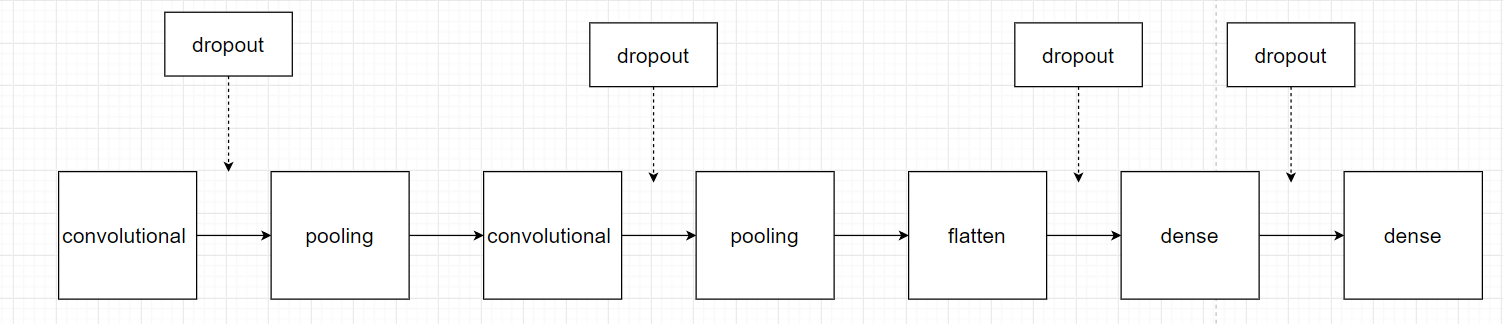

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(Dropout(0.25))
cnn.add(MaxPooling2D((2,2)))

cnn.add(Flatten())
cnn.add(Dropout(0.25))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation='softmax'))

### 訓練配置


In [8]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 進行訓練

In [9]:
history = cnn.fit(x=x_train_norm, # sample
                  y=y_train_onehot, # label
                  batch_size=128, # 每批用 128 筆資料進行訓練
                  epochs=20,# 20 個訓練週期
                  validation_split=0.1 # 從訓練資料拿 10% 作為驗證資料
                 )

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 10s 230us/sample - loss: 1.5460 - acc: 0.4451 - val_loss: 1.2905 - val_acc: 0.5724
Epoch 2/20
45000/45000 [==============================] - 7s 151us/sample - loss: 1.1595 - acc: 0.5861 - val_loss: 1.1135 - val_acc: 0.6482
Epoch 3/20
45000/45000 [==============================] - 7s 149us/sample - loss: 1.0171 - acc: 0.6383 - val_loss: 1.0133 - val_acc: 0.6794
Epoch 4/20
45000/45000 [==============================] - 7s 150us/sample - loss: 0.9049 - acc: 0.6824 - val_loss: 0.9247 - val_acc: 0.6994
Epoch 5/20
45000/45000 [==============================] - 7s 152us/sample - loss: 0.8260 - acc: 0.7111 - val_loss: 0.8852 - val_acc: 0.7084
Epoch 6/20
45000/45000 [==============================] - 7s 151us/sample - loss: 0.7412 - acc: 0.7391 - val_loss: 0.8221 - val_acc: 0.7236
Epoch 7/20
45000/45000 [==============================] - 7s 148us/sample - loss: 0.6600 - acc: 0.7666 - val_l

In [10]:
import matplotlib.pyplot as plt

# 繪製線圖 (可將訓練時所傳回的損失值或準確率等歷史記錄繪製成線圖)
# history: 內含一或多筆要繪資料的字典, 例如：{'loss': [4,2,1,…], 'acc': [2,3,5,…]}
# keys: 以 tuple 或串列指定 history 中要繪製的 key 值, 例如：('loss', 'acc')
# title: 以字串指定圖表的標題文字
# xyLabel: 以 tuple 或串列指定 x, y 軸的說明文字, 例如：('epoch', 'Accuracy')
# ylim: 以 tuple 或串列指定 y 軸的最小值及最大值, 例如 (1, 3), 超出範圍的值會被忽略
# size: 以 tuple 指定圖的尺寸, 預設為 (6, 4) (即寬 6 高 4 英吋)
def plot(history_dict, keys, title=None, xyLabel=[], ylim=(), size=()):
    lineType = ('-', '--', '.', ':')    # 線條的樣式, 畫多條線時會依序採用
    if len(ylim)==2: plt.ylim(*ylim)    # 設定 y 軸最小值及最大值
    if len(size)==2: plt.gcf().set_size_inches(*size)  # size預設為 (6,4)
    epochs = range(1, len(history_dict[keys[0]])+1)  # 計算有幾週期的資料
    for i in range(len(keys)):   # 走訪每一個 key (例如 'loss' 或 'acc' 等)
        plt.plot(epochs, history_dict[keys[i]], lineType[i])  # 畫出線條
    if title:   # 是否顯示標題欄
        plt.title(title)
    if len(xyLabel)==2:  # 是否顯示 x, y 軸的說明文字
        plt.xlabel(xyLabel[0])
        plt.ylabel(xyLabel[1])
    plt.legend(keys, loc='best') #upper left')  # 顯示圖例 (會以 key 為每條線的說明)
    plt.show()  # 顯示出畫好的圖

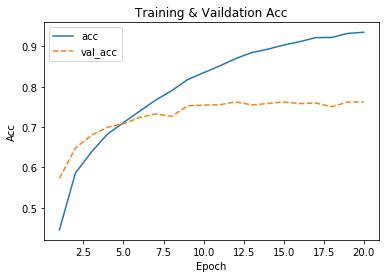

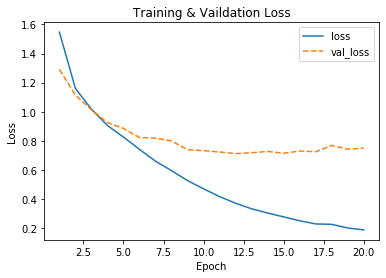

In [11]:
plot(history.history, ('acc', 'val_acc'), 'Training & Vaildation Acc', ('Epoch', 'Acc'))
plot(history.history, ('loss', 'val_loss'), 'Training & Vaildation Loss', ('Epoch', 'Loss'))

出現 overfitting 訓練準確率越來越好，但驗證損失無法再改善了

In [12]:
cnn.save('C:\\Users\\User\\Desktop\\kreas\\CNN\\cifar10.h5')

### 評估

In [13]:
test_loss, test_val = cnn.evaluate(x_test_norm, y_test_onehot)
print('loss:', test_loss)
print('val:', test_val)

10000/10000 [==============================] - 1s 133us/sample - loss: 0.7930 - acc: 0.7510
loss: 0.7929955836772918
val: 0.751


### 預測

In [14]:
pred_prop = cnn.predict(x_test_norm)
print(pred_prop[0])

[1.25928782e-04 5.69480995e-04 1.14697075e-04 7.50150204e-01
 6.66407504e-05 2.48239428e-01 1.55854636e-04 2.38531153e-04
 2.31459941e-04 1.07702108e-04]


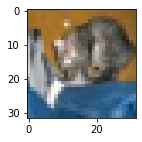

In [15]:
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[0])
plt.show()

In [17]:
pred_class = cnn.predict_classes(x_test_norm)
print('Pre Label:', pred_class[:10])
print('Ori Label:', y_test[:10].reshape(10))

Pre Label: [3 8 0 0 6 6 1 6 3 1]
Ori Label: [3 8 8 0 6 6 1 6 3 1]
